## Informasi Mahasiswa

Nama: Devi Anggraini

NPM : 210810701008

## Jenis Dataset


Dataset yang digunakan di ambil dari situs kaggel (https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset).
Data ini terdiri dari beberapa atribut sebagai berikut:
- Kehamilan (Pregnancies): Jumlah kehamilan yang pernah dialami oleh pasien.
- Glukosa (Glucose): Konsentrasi glukosa plasma 2 jam setelah tes toleransi glukosa oral.
- Tekanan darah (BloodPressure): Tekanan darah diastolik (mm Hg).
- Ketebalan Kulit (	SkinThickness): Ketebalan lipatan kulit trisep (mm).
- Insulin (Insulin): Kadar insulin serum 2 jam setelah pemberian glukosa (mu U/ml).
- IMT (Indeks Massa Tubuh)/ (BMI): IMT (berat dalam kg/(tinggi dalam m)^2).
- Fungsi Pedigree Diabetes (DiabetesPedigreeFunction): Nilai fungsi pedigri diabetes.
- Usia (Age): Usia pasien (tahun).
- Hasil (Outcome): Variabel kelas yang menunjukkan apakah pasien dinyatakan positif (1) atau negatif (0) terhadap diabetes.
Dataset ini berisi 768 instansi dengan 8 atribut numerik dan satu atribut kelas. Semua pasien dalam dataset ini adalah wanita setidaknya berusia 21 tahun dengan warisan Indian Pima.

Tujuannya adalah untuk memprediksi apakah seorang pasien memiliki diabetes berdasarkan pengukuran diagnostik.


## Import Library

In [3]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [4]:
# Melakukan Pembacaan Dataset 
data = pd.read_csv('diabetes.csv')

# Menampilkan data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Preprocessing

In [13]:
#Checking Null Values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# Membuat objek LabelEncoder
en = LabelEncoder()

# Lakukan encoding pada setiap kolom yang memerlukan
data['Pregnancies'] = en.fit_transform(data['Pregnancies'])
data['Glucose'] = en.fit_transform(data['Glucose'])
data['BloodPressure'] = en.fit_transform(data['BloodPressure'])
data['SkinThickness'] = en.fit_transform(data['SkinThickness'])
data['Insulin'] = en.fit_transform(data['Insulin'])
data['BMI'] = en.fit_transform(data['BMI'])
data['DiabetesPedigreeFunction'] = en.fit_transform(data['DiabetesPedigreeFunction'])
data['Age'] = en.fit_transform(data['Age'])
data['Outcome'] = en.fit_transform(data['Outcome'])

# Tampilkan data setelah encoding
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6       86             22             28        0  123   
1            1       23             19             22        0   62   
2            8      121             17              0        0   30   
3            1       27             19             16       62   77   
4            0       75              4             28      102  209   

   DiabetesPedigreeFunction  Age  Outcome  
0                       350   29        1  
1                       196   10        0  
2                       368   11        1  
3                        53    0        0  
4                       514   12        1  


In [15]:
#Checking Duplicates
data_duplicates_rows=data[data.duplicated()]
data_duplicates_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
#Removing Duplicates in any
data=data.drop_duplicates()
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


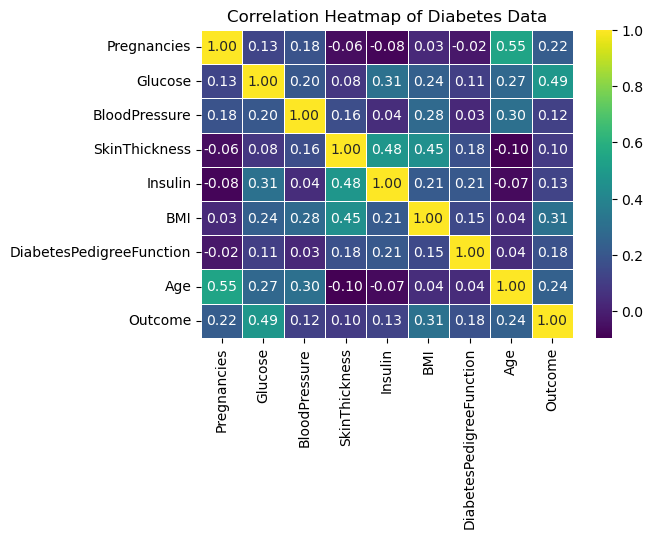

In [17]:
# Menghitung korelasi antar variabel
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Diabetes Data')
plt.show()

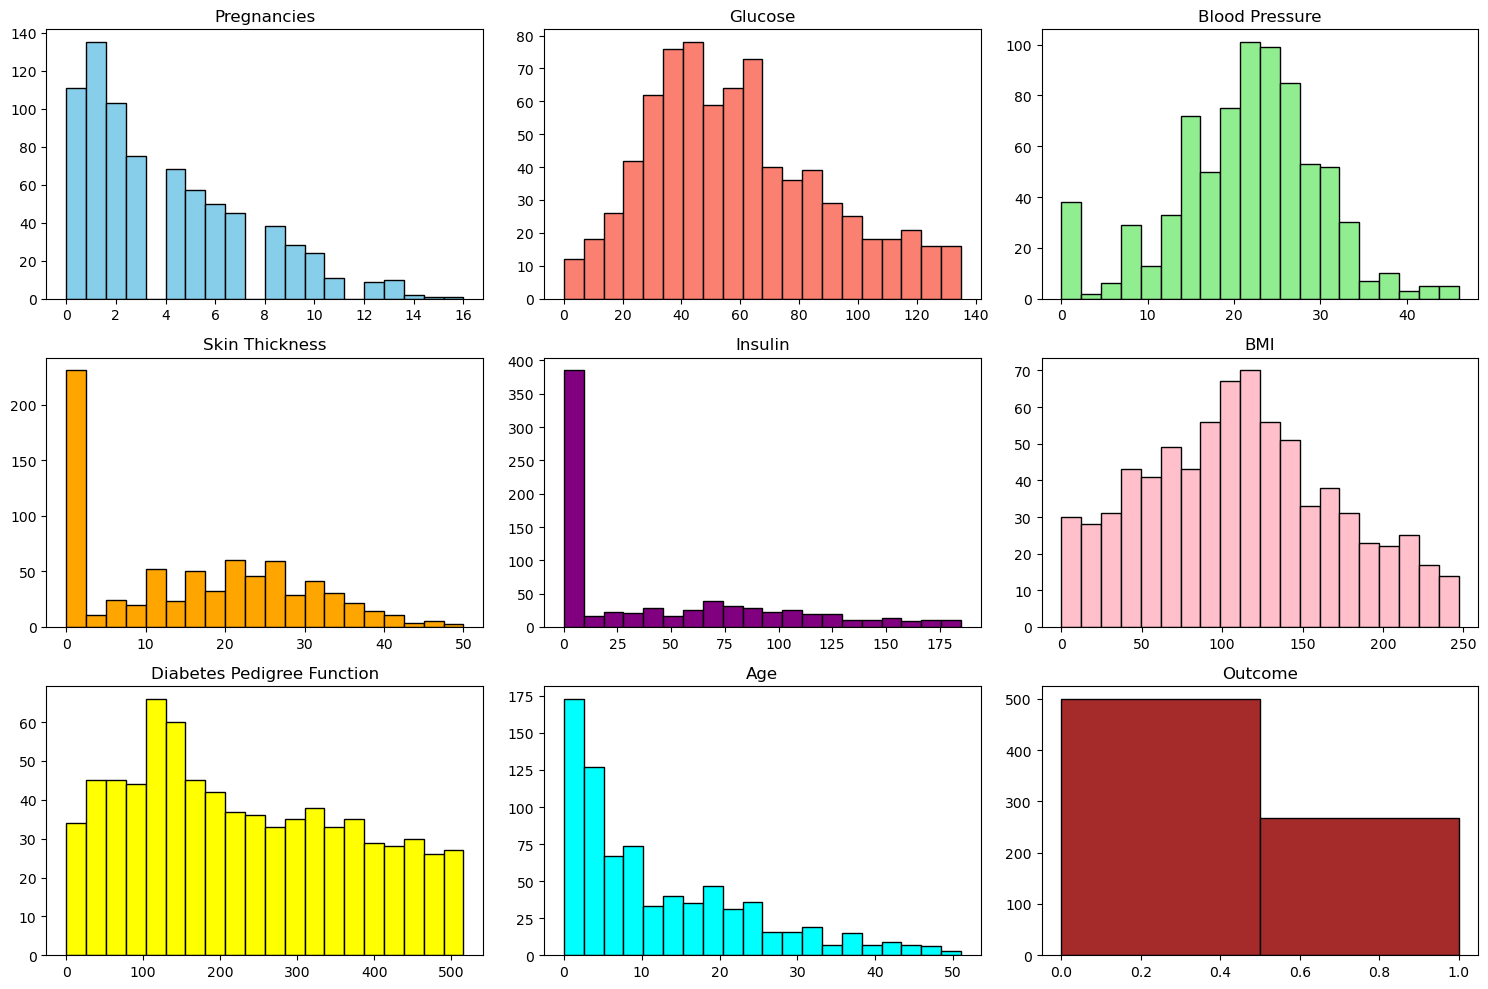

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Menggunakan histogram untuk melihat distribusi setiap variabel
plt.figure(figsize=(15, 10))

# Variabel 'Pregnancies'
plt.subplot(3, 3, 1)
plt.hist(data['Pregnancies'], bins=20, color='skyblue', edgecolor='black')
plt.title('Pregnancies')

# Variabel 'Glucose'
plt.subplot(3, 3, 2)
plt.hist(data['Glucose'], bins=20, color='salmon', edgecolor='black')
plt.title('Glucose')

# Variabel 'BloodPressure'
plt.subplot(3, 3, 3)
plt.hist(data['BloodPressure'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Blood Pressure')

# Variabel 'SkinThickness'
plt.subplot(3, 3, 4)
plt.hist(data['SkinThickness'], bins=20, color='orange', edgecolor='black')
plt.title('Skin Thickness')

# Variabel 'Insulin'
plt.subplot(3, 3, 5)
plt.hist(data['Insulin'], bins=20, color='purple', edgecolor='black')
plt.title('Insulin')

# Variabel 'BMI'
plt.subplot(3, 3, 6)
plt.hist(data['BMI'], bins=20, color='pink', edgecolor='black')
plt.title('BMI')

# Variabel 'DiabetesPedigreeFunction'
plt.subplot(3, 3, 7)
plt.hist(data['DiabetesPedigreeFunction'], bins=20, color='yellow', edgecolor='black')
plt.title('Diabetes Pedigree Function')

# Variabel 'Age'
plt.subplot(3, 3, 8)
plt.hist(data['Age'], bins=20, color='cyan', edgecolor='black')
plt.title('Age')

# Variabel 'Outcome'
plt.subplot(3, 3, 9)
plt.hist(data['Outcome'], bins=2, color='brown', edgecolor='black')
plt.title('Outcome')

plt.tight_layout()
plt.show()

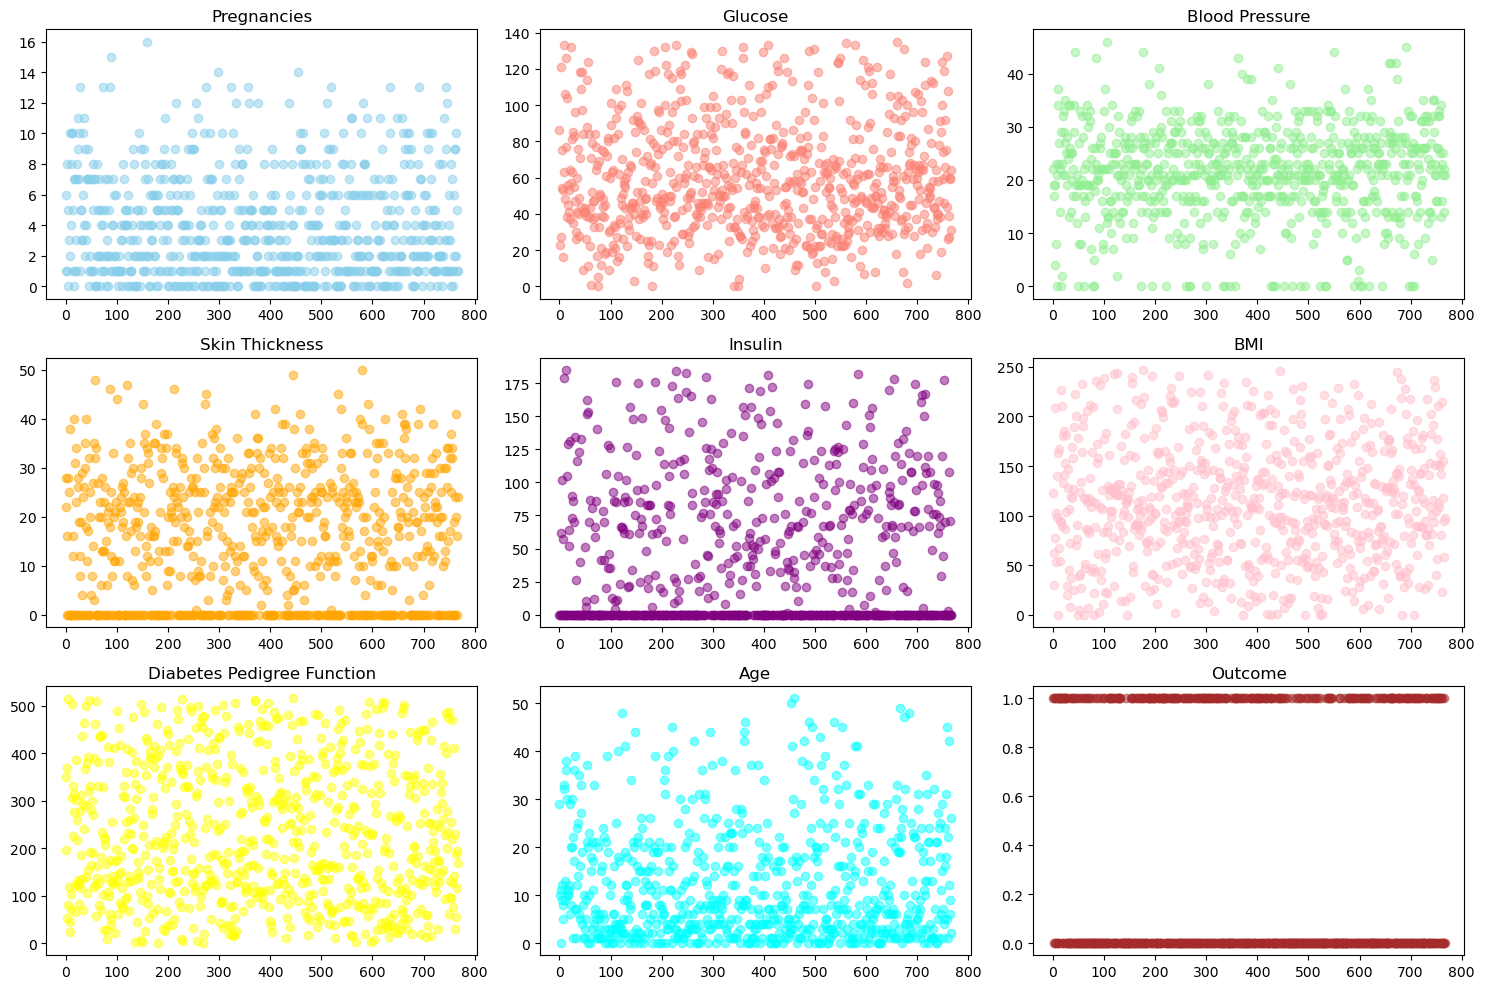

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Membuat scatter plot untuk setiap variabel
plt.figure(figsize=(15, 10))

# Variabel 'Pregnancies'
plt.subplot(3, 3, 1)
plt.scatter(data.index, data['Pregnancies'], color='skyblue', alpha=0.5)
plt.title('Pregnancies')

# Variabel 'Glucose'
plt.subplot(3, 3, 2)
plt.scatter(data.index, data['Glucose'], color='salmon', alpha=0.5)
plt.title('Glucose')

# Variabel 'BloodPressure'
plt.subplot(3, 3, 3)
plt.scatter(data.index, data['BloodPressure'], color='lightgreen', alpha=0.5)
plt.title('Blood Pressure')

# Variabel 'SkinThickness'
plt.subplot(3, 3, 4)
plt.scatter(data.index, data['SkinThickness'], color='orange', alpha=0.5)
plt.title('Skin Thickness')

# Variabel 'Insulin'
plt.subplot(3, 3, 5)
plt.scatter(data.index, data['Insulin'], color='purple', alpha=0.5)
plt.title('Insulin')

# Variabel 'BMI'
plt.subplot(3, 3, 6)
plt.scatter(data.index, data['BMI'], color='pink', alpha=0.5)
plt.title('BMI')

# Variabel 'DiabetesPedigreeFunction'
plt.subplot(3, 3, 7)
plt.scatter(data.index, data['DiabetesPedigreeFunction'], color='yellow', alpha=0.5)
plt.title('Diabetes Pedigree Function')

# Variabel 'Age'
plt.subplot(3, 3, 8)
plt.scatter(data.index, data['Age'], color='cyan', alpha=0.5)
plt.title('Age')

# Variabel 'Outcome'
plt.subplot(3, 3, 9)
plt.scatter(data.index, data['Outcome'], color='brown', alpha=0.5)
plt.title('Outcome')

plt.tight_layout()
plt.show()

### Split Dataset

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur (features) dan target (target)
X = data.drop('Outcome', axis=1)  # Mengambil semua kolom kecuali Outcome sebagai fitur
y = data['Outcome']  # Hanya mengambil kolom Outcome sebagai target

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur-fitur (features) menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tampilkan contoh beberapa data latih yang sudah dinormalisasi
print("Contoh data latih yang sudah dinormalisasi:")
print(X_train_scaled[:5])

# Tampilkan contoh beberapa data uji yang sudah dinormalisasi
print("Contoh data uji yang sudah dinormalisasi:")
print(X_test_scaled[:5])

Contoh data latih yang sudah dinormalisasi:
[[-0.52690481 -1.23757011 -2.51101154 -1.19969199 -0.82696208 -1.86707171
  -0.46125349 -1.04006444]
 [ 1.59155812 -0.31069991  0.78611749  0.12570862 -0.82696208 -0.55979396
   1.87938035  1.49649048]
 [-0.82954237  0.58306777 -1.80448389 -0.26411509  0.16661229 -0.4759941
   0.93466669 -0.95259703]
 [-1.13217993  1.31132292 -1.56897467 -1.19969199 -0.82696208 -1.56539223
  -0.74325757  2.80850164]
 [ 0.68364543  0.41755524  0.66836288  1.13925027  2.30661862  1.9709617
  -0.841959    1.14662083]]
Contoh data uji yang sudah dinormalisasi:
[[ 0.68364543 -0.77413501 -0.98020163  0.8273913   1.35125865  0.26144463
   0.13095507  0.8842186 ]
 [-0.52690481 -0.31069991  0.31509906  0.74942656 -0.82696208  0.54636414
  -1.36366654 -1.04006444]
 [-0.52690481 -0.44310994 -0.5091832  -1.19969199 -0.82696208 -0.17431462
  -1.30021563 -1.04006444]
 [ 1.28892055 -0.47621245  0.66836288 -1.19969199 -0.82696208 -1.14639295
   1.47752454  0.0970119 ]
 [ 0.9

# SVM dan ANN

### Preparation

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras import models, layers

In [22]:
# Inisialisasi model SVM dan ANN
models = {
    "Support Vector Machine": SVC(kernel='linear'),
    "Artificial Neural Network": tf.keras.Sequential([
        layers.Dense(264, input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(132, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
}

C:\Users\Windows X\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile model ANN
models["Artificial Neural Network"].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model ANN
print("Ringkasan Model Artificial Neural Network:")
print(models["Artificial Neural Network"].summary())

Ringkasan Model Artificial Neural Network:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 264)            │         2,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 132)            │        34,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,933 (179.43 KB)

 Trainable params: 45,933 (179.43 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
# Training model SVM
models["Support Vector Machine"].fit(X_train_scaled, y_train)

# Testing model SVM
svm_accuracy = models["Support Vector Machine"].score(X_test_scaled, y_test)
print("Accuracy of Support Vector Machine on test set:", svm_accuracy)

# Training model ANN
models["Artificial Neural Network"].fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Testing model ANN
ann_loss, ann_accuracy = models["Artificial Neural Network"].evaluate(X_test_scaled, y_test, verbose=0)
print("Accuracy of Artificial Neural Network on test set:", ann_accuracy)

Accuracy of Support Vector Machine on test set: 0.7727272727272727
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3733 
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.3360 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8400 - loss: 0.3462
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3222 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.3200
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.3564 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8566 - loss: 0.3527
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3262 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.3213 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3468 
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.3139 

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediksi model SVM pada data uji
svm_pred = models["Support Vector Machine"].predict(X_test_scaled)

# Prediksi model ANN pada data uji
ann_pred_probs = models["Artificial Neural Network"].predict(X_test_scaled)
ann_pred = (ann_pred_probs > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


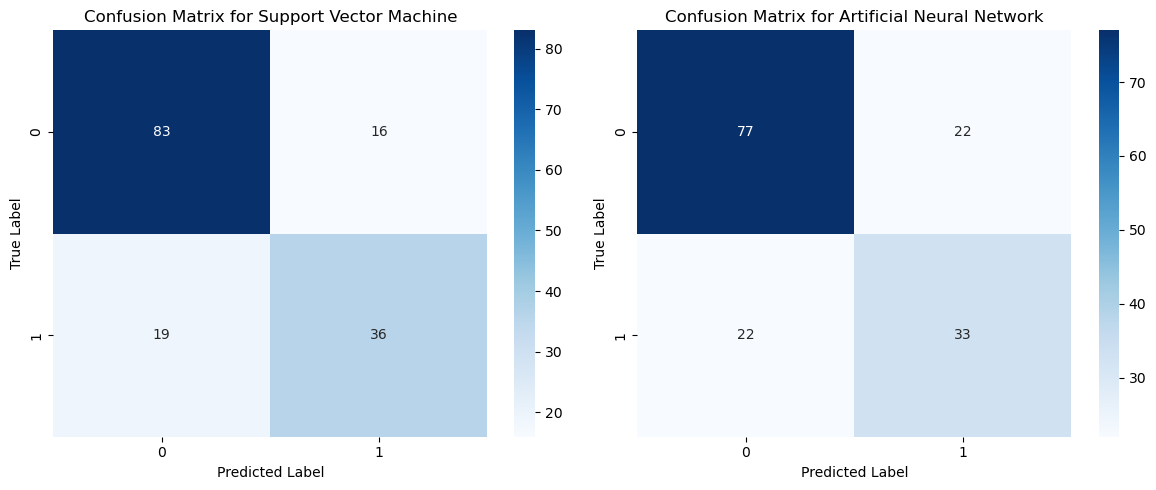

In [33]:
# Matrix evaluasi untuk model SVM
svm_cm = confusion_matrix(y_test, svm_pred)

# Matrix evaluasi untuk model ANN
ann_cm = confusion_matrix(y_test, ann_pred)

# Visualisasi matriks evaluasi untuk model SVM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Visualisasi matriks evaluasi untuk model ANN
plt.subplot(1, 2, 2)
sns.heatmap(ann_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Artificial Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [31]:
# Tampilkan hasil klasifikasi untuk model SVM
print("HASIL KLASIFIKASI UNTUK MODEL SUPPORT VECTOR MACHINE:\n")
print(classification_report(y_test, svm_pred))

# Tampilkan hasil klasifikasi untuk model ANN
print("\nHASIL KLASIFIKASI UNTUK MODEL ARTIFICIAL NEURAL NETWORK:\n")
print(classification_report(y_test, ann_pred))

HASIL KLASIFIKASI UNTUK MODEL SUPPORT VECTOR MACHINE:

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


HASIL KLASIFIKASI UNTUK MODEL ARTIFICIAL NEURAL NETWORK:

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

